#Collecting Data

Data ini diambil dari kaggle https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

#Preparing Dataset

1. Importing necessary library
2. Filtering dataset (surabaya only)
3. Cleaning unnecessary variable
4. Exploratory data analysis

#Importing necessary library


In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Filtering Dataset (Surabaya Only)

In [2]:
#Importing dataset
place = pd.read_csv("D:/KULIAH/Semester 6/BANGKIT/CAPSTONE/Dataset/tourism_new.csv", delimiter=';')
rating = pd.read_csv("D:/KULIAH/Semester 6/BANGKIT/CAPSTONE/Dataset/tourism_rating.csv")
user = pd.read_csv("D:/KULIAH/Semester 6/BANGKIT/CAPSTONE/Dataset/user.csv", delimiter=';')

In [3]:
#looking for data
print(place.head())
place.info()

   Place_Id             Place_Name  \
0       393  Taman Harmoni Keputih   
1       394      Air Mancur Menari   
2       395         Taman Prestasi   
3       396    Monumen Kapal Selam   
4       397    Taman Kunang-Kunang   

                                         Description       Category      City  \
0  Tempat tersebut ialah Taman Hatmoni Keputih Su...     Cagar Alam  Surabaya   
1  Jembatan Kenjeran dengan air mancur menarinya ...  Taman Hiburan  Surabaya   
2  Taman Prestasi Surabaya merupakan salah satu t...  Taman Hiburan  Surabaya   
3  Monumen Kapal Selam, atau disingkat Monkasel, ...         Budaya  Surabaya   
4  Taman Kunang – Kunang di Surabaya ini mempunya...  Taman Hiburan  Surabaya   

   Price  Rating  Time_Minutes                  Coordinate  \
0      0     4.4          60.0  {'lat': -7.308648199999999   
1  35000     4.4          60.0          {'lat': -7.2952211   
2      0     4.6          45.0          {'lat': -7.2356933   
3  15000     4.4           NaN      

In [4]:
#looking for data
print(rating.head())
rating.info()

   User_Id  Place_Id  Place_Ratings
0        1       179              3
1        1       344              2
2        1         5              5
3        1       373              3
4        1       101              4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [5]:
#looking for data
print(user.head())
user.info()

   User_Id                   Location  Age
0        1      Semarang, Jawa Tengah   20
1        2         Bekasi, Jawa Barat   21
2        3        Cirebon, Jawa Barat   23
3        4         Bekasi, Jawa Barat   21
4        5  Lampung, Sumatera Selatan   20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [6]:
#Filtering data
#1. Selecting database rating only for the city of Surabaya
rating = pd.merge(rating, place[['Place_Id']], how ='right', on='Place_Id')

#2. Selecting database users for those who only visit the city of Surabaya
user = pd.merge(user, rating[['User_Id']], how = 'right', on='User_Id').drop_duplicates().sort_values('User_Id')

print(rating.tail())
print(user.tail())

     User_Id  Place_Id  Place_Ratings
832      274       436              4
833      284       436              1
834      290       436              3
835      292       436              2
836      294       436              1
     User_Id                     Location  Age
291      296    Lampung, Sumatera Selatan   31
453      297  Palembang, Sumatera Selatan   39
583      298            Bogor, Jawa Barat   38
198      299          Sragen, Jawa Tengah   27
97       300         Ponorogo, Jawa Timur   26


#Cleaning unnecessary variable

In [7]:
#Removing the "time minutes" column in the place dataset
place = place.drop(['Time_Minutes'], axis=1)

#Changing the data "price" type in place dataset to float
place["Price"] = place["Price"].astype("float")

#Changing the data "rating" type in rating dataset to float 
rating["Place_Ratings"] = rating["Place_Ratings"].astype("float")

In [8]:
print(place.head())
print(place.info())
print(rating.info())

   Place_Id             Place_Name  \
0       393  Taman Harmoni Keputih   
1       394      Air Mancur Menari   
2       395         Taman Prestasi   
3       396    Monumen Kapal Selam   
4       397    Taman Kunang-Kunang   

                                         Description       Category      City  \
0  Tempat tersebut ialah Taman Hatmoni Keputih Su...     Cagar Alam  Surabaya   
1  Jembatan Kenjeran dengan air mancur menarinya ...  Taman Hiburan  Surabaya   
2  Taman Prestasi Surabaya merupakan salah satu t...  Taman Hiburan  Surabaya   
3  Monumen Kapal Selam, atau disingkat Monkasel, ...         Budaya  Surabaya   
4  Taman Kunang – Kunang di Surabaya ini mempunya...  Taman Hiburan  Surabaya   

     Price  Rating                  Coordinate                   Lat  \
0      0.0     4.4  {'lat': -7.308648199999999   'lng': 112.8216622}   
1  35000.0     4.4          {'lat': -7.2952211   'lng': 112.8035603}   
2      0.0     4.6          {'lat': -7.2356933   'lng': 112.7955234}

In [9]:
#Shape Info for place, user dan rating dataset
print(place.shape)
print(user.shape)
print(rating.shape)

(37, 11)
(277, 3)
(837, 3)


#Exploratory data analysis

In [10]:
#Showing tourist attractions with the highest number of ratings
top_15 = rating['Place_Id'].value_counts().reset_index()[0:15]
top_15 = pd.merge(top_15, place[['Place_Id', 'Place_Name']], how='left', left_on='index', right_on='Place_Id')
print(top_15)

    index  Place_Id_x  Place_Id_y                       Place_Name
0     402          33         402      Food Junction Grand Pakuwon
1     430          32         430           Atlantis Land Surabaya
2     416          31         416                 Keraton Surabaya
3     406          29         406             Kebun Bibit Wonorejo
4     398          28         398              Taman Buah Surabaya
5     427          28         427         Patung Buddha Empat Rupa
6     405          27         405              Surabaya North Quay
7     424          26         424              Pantai Ria Kenjeran
8     407          26         407  Taman Ekspresi Dan Perpustakaan
9     417          26         417          Kelenteng Sanggar Agung
10    434          25         434                    Taman Bungkul
11    423          24         423            Patung Sura dan Buaya
12    428          24         428   Monumen Bambu Runcing Surabaya
13    400          23         400              Hutan Bambu Kep

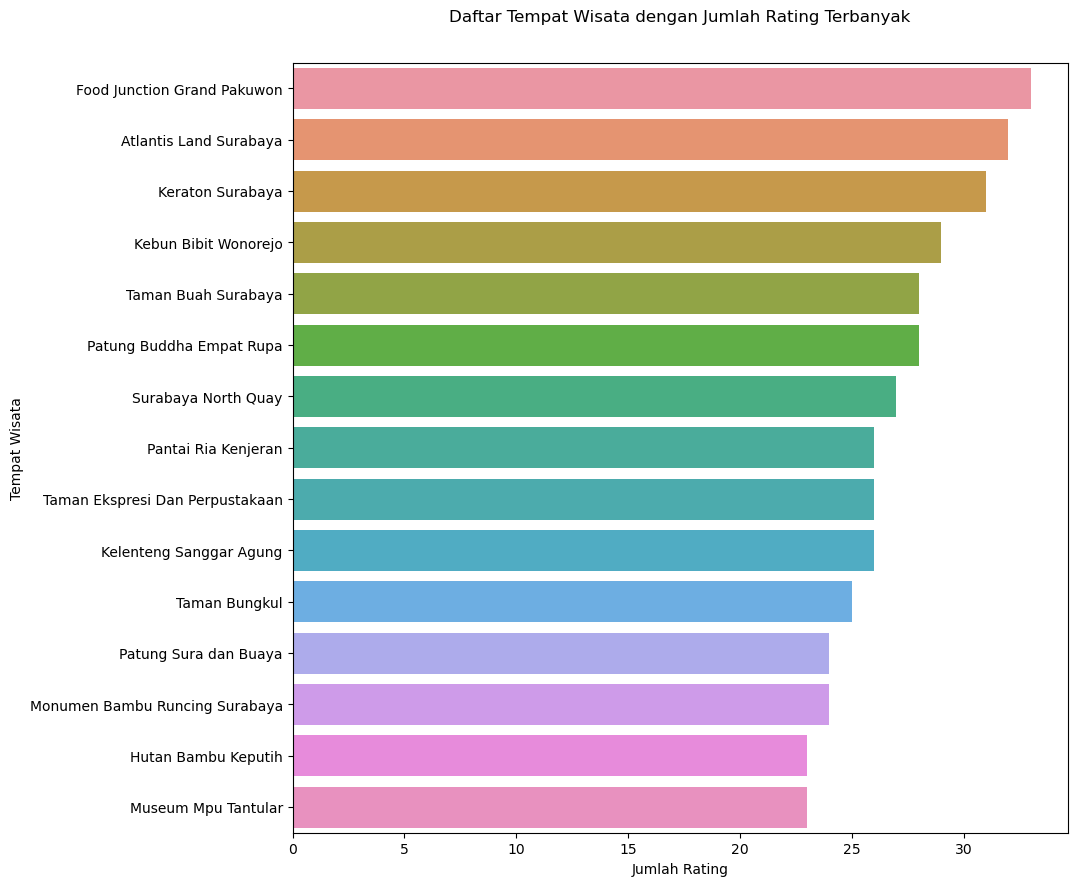

In [11]:
#Displaying the plot
plt.figure(figsize=(10, 10))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_15)
plt.title('Daftar Tempat Wisata dengan Jumlah Rating Terbanyak', pad=30)
plt.xlabel('Jumlah Rating')
plt.ylabel('Tempat Wisata')
plt.show()

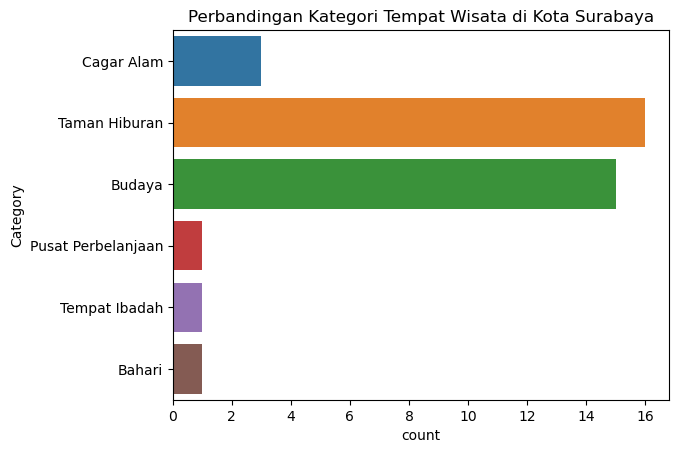

In [12]:
#Displaying the comparison of the destination categories in the Surabaya
sns.countplot(y='Category', data=place)
plt.title('Perbandingan Kategori Tempat Wisata di Kota Surabaya')
plt.show()

#Filtering Lokasi

In [13]:
lokasi  =  place.drop(['Place_Id', 'City', 'Coordinate', 'Lat', 'Long'], axis=1)

In [14]:
sby_timur = lokasi[lokasi['Lokasi']== "Surabaya Timur"]
sby_barat = lokasi[lokasi['Lokasi']== "Surabaya Barat"]
sby_utara = lokasi[lokasi['Lokasi']== "Surabaya Utara"]
sby_selatan = lokasi[lokasi['Lokasi']== "Surabaya Selatan"] 
sby_pusat = lokasi[lokasi['Lokasi']== "Surabaya Pusat"]

In [15]:
sby_timur

,Place_Name,Description,Category,Price,Rating,Lokasi
0,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,0.0,4.4,Surabaya Timur
6,Taman Pelangi,Kalau pelangi biasanya ada di siang hari pasca...,Taman Hiburan,0.0,4.5,Surabaya Timur
7,Hutan Bambu Keputih,Surabaya menjadi kota metropolitan kedua setel...,Cagar Alam,0.0,4.3,Surabaya Timur
25,Pantai Ria Kenjeran,Obyek wisata Pantai Ria Kenjeran Surabaya meru...,Bahari,15000.0,4.2,Surabaya Timur
30,Atlantis Land Surabaya,"Sejak diresmikan pada bulan Desember 2017, Atl...",Taman Hiburan,125000.0,4.4,Surabaya Timur
35,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,0.0,4.4,Surabaya Timur
36,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,0.0,4.6,Surabaya Timur



# Filtering Harga


In [16]:
filter_harga  = lokasi[lokasi['Price'] != 0.0]

In [17]:
Price = filter_harga.sort_values('Price', ascending=True)
Price

,Place_Name,Description,Category,Price,Rating,Lokasi
33,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,2000.0,4.4,Surabaya Barat
17,Museum De Javasche Bank,Museum Bank Indonesia (Bahasa Indonesia: Museu...,Budaya,5000.0,4.6,Surabaya Utara
31,Taman Hiburan Rakyat,Taman Hiburan Rakyat atau THR tentunya sudah t...,Taman Hiburan,5000.0,4.2,Surabaya Utara
19,Kelenteng Sanggar Agung,Kelenteng Sanggar Agung atau Klenteng Hong San...,Budaya,10000.0,4.5,Surabaya Utara
22,Museum Kesehatan Dr. Adhyatma,"Museum Kesehatan Dr. Adhyatma, MPH adalah muse...",Budaya,10000.0,4.4,Surabaya Utara
3,Monumen Kapal Selam,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Budaya,15000.0,4.4,Surabaya Pusat
25,Pantai Ria Kenjeran,Obyek wisata Pantai Ria Kenjeran Surabaya meru...,Bahari,15000.0,4.2,Surabaya Timur
1,Air Mancur Menari,Jembatan Kenjeran dengan air mancur menarinya ...,Taman Hiburan,35000.0,4.4,Surabaya Utara
10,Kenjeran Park,Kenjeran Park merupakan salah satu tempat wisa...,Taman Hiburan,35000.0,4.2,Surabaya Utara
11,Surabaya North Quay,Surabaya menjadi kota besar yang sering menjad...,Taman Hiburan,50000.0,4.4,Surabaya Utara
